In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [3]:
r =  pd.read_csv('train.csv')
e =  pd.read_csv('test.csv')

In [4]:
r.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
r.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
r.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Univariate Variable Analysis

#### Categories

In [8]:
def bar(va):
    v = r[va]
    vv = v.value_counts()
    
    plt.figure(figsize = (9,4))
    plt.bar(vv.index, vv)
    plt.xticks(vv.index, vv.index.values)
    plt.ylabel('frequency')
    plt.title(va)
    plt.show()
    
    print('{}: \n{}'.format(va,vv))

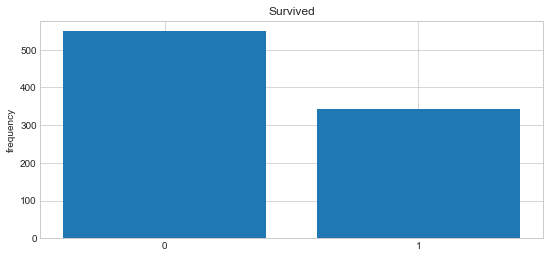

Survived: 
0    549
1    342
Name: Survived, dtype: int64


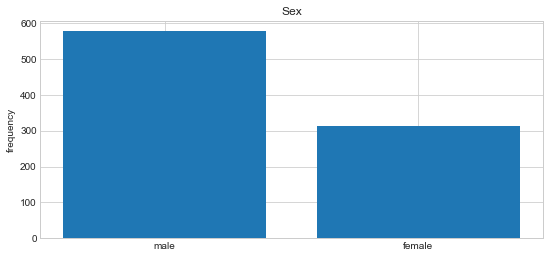

Sex: 
male      577
female    314
Name: Sex, dtype: int64


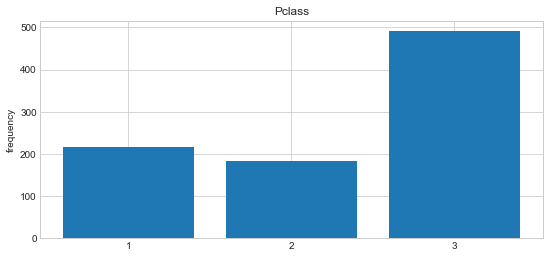

Pclass: 
3    491
1    216
2    184
Name: Pclass, dtype: int64


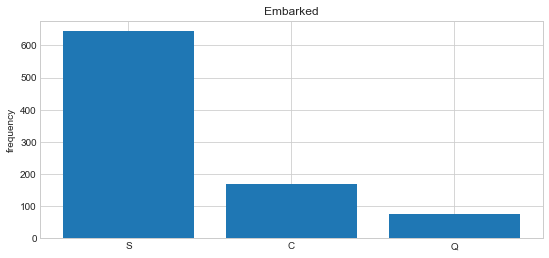

Embarked: 
S    644
C    168
Q     77
Name: Embarked, dtype: int64


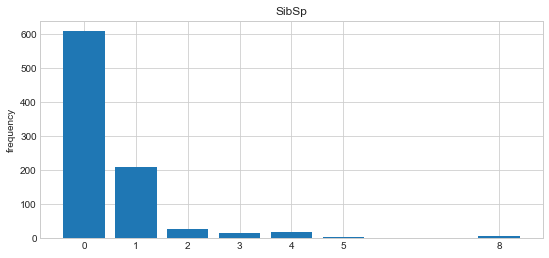

SibSp: 
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


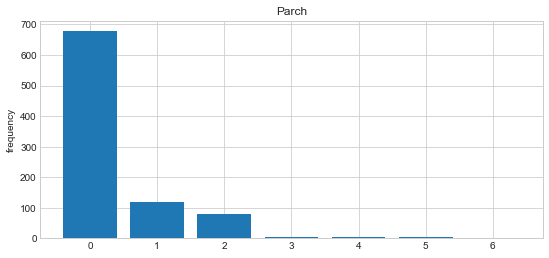

Parch: 
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [9]:
v = ['Survived','Sex','Pclass','Embarked','SibSp','Parch']

for c in v:
    bar(c)

In [10]:
c1 = ['Cabin','Name','Ticket']

for c in c1:
    print('{} \n'.format(r[c].value_counts()))

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64 

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64 

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64 



#### Numbers

In [11]:
def hist(v):
    plt.figure(figsize = (9,3))
    plt.hist(r[v], bins = 50)
    plt.xlabel(v)
    plt.ylabel('frequency')
    plt.title('histogram for {}'.format(v))

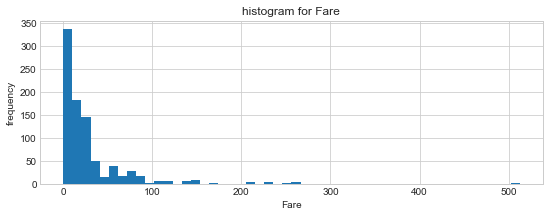

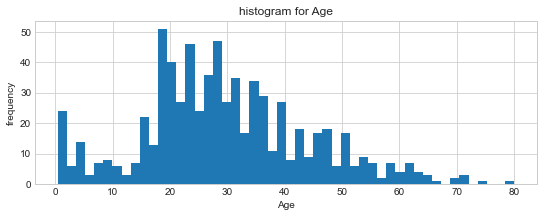

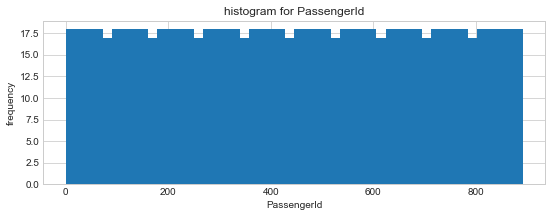

In [12]:
n = ['Fare','Age','PassengerId']

for n in n:
    hist(n)

### Data Analysis

In [13]:
def da(x):
    return r[[x,"Survived"]].groupby([x], as_index = False).mean().sort_values(by="Survived",ascending = False)

In [14]:
da('Pclass')

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [15]:
da('SibSp')

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [16]:
da('Parch')

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### Outlier Detection

In [17]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        Q1 = np.percentile(df[c],25)
        Q3 = np.percentile(df[c],75)
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [18]:
r.loc[detect_outliers(r,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [19]:
r = r.drop(detect_outliers(r,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

### Missing value

In [20]:
rl = len(r)
r = pd.concat([r,e],axis = 0).reset_index(drop = True)

In [21]:
r.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
r.columns[r.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [23]:
r.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

In [24]:
r[r["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


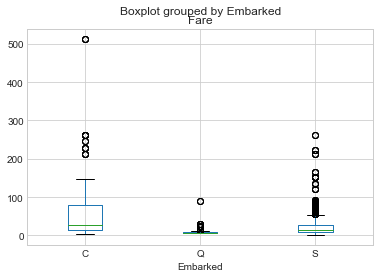

In [25]:
r.boxplot(column="Fare",by = "Embarked")
plt.show()

In [26]:
r["Embarked"] = r["Embarked"].fillna("C")
r[r["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [27]:
r[r["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [28]:
r["Fare"] = r["Fare"].fillna(np.mean(r[r["Pclass"] == 3]["Fare"]))

In [29]:
r[r["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Visualization

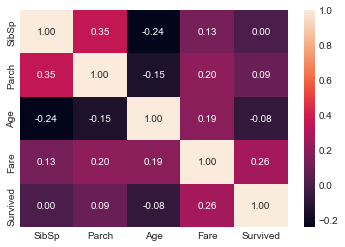

In [30]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(r[list1].corr(), annot = True, fmt = ".2f");

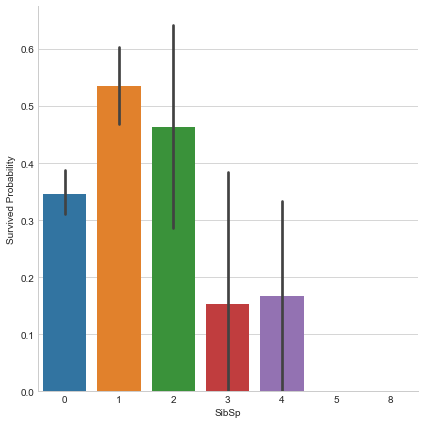

In [31]:
g = sns.factorplot(x = "SibSp", y = "Survived", data = r, kind = "bar", size = 6)
g.set_ylabels("Survived Probability");

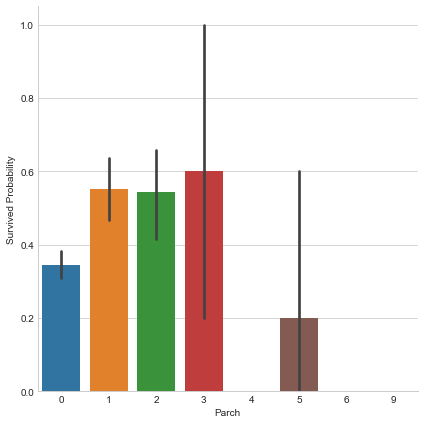

In [32]:
g = sns.factorplot(x = "Parch", y = "Survived", kind = "bar", data = r, size = 6)
g.set_ylabels("Survived Probability");

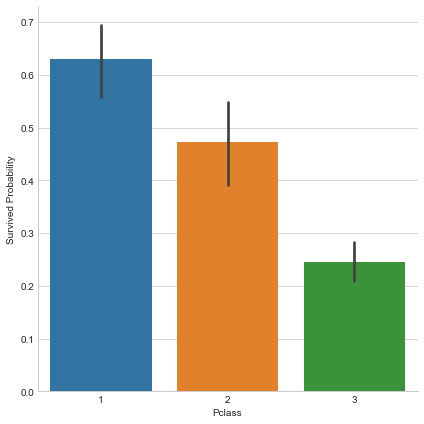

In [33]:
g = sns.factorplot(x = "Pclass", y = "Survived", data = r, kind = "bar", size = 6)
g.set_ylabels("Survived Probability");

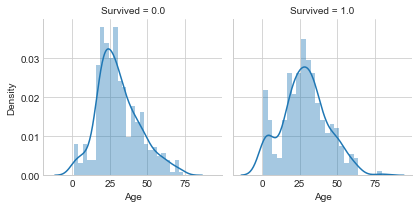

In [34]:
g = sns.FacetGrid(r, col = "Survived")
g.map(sns.distplot, "Age", bins = 25);

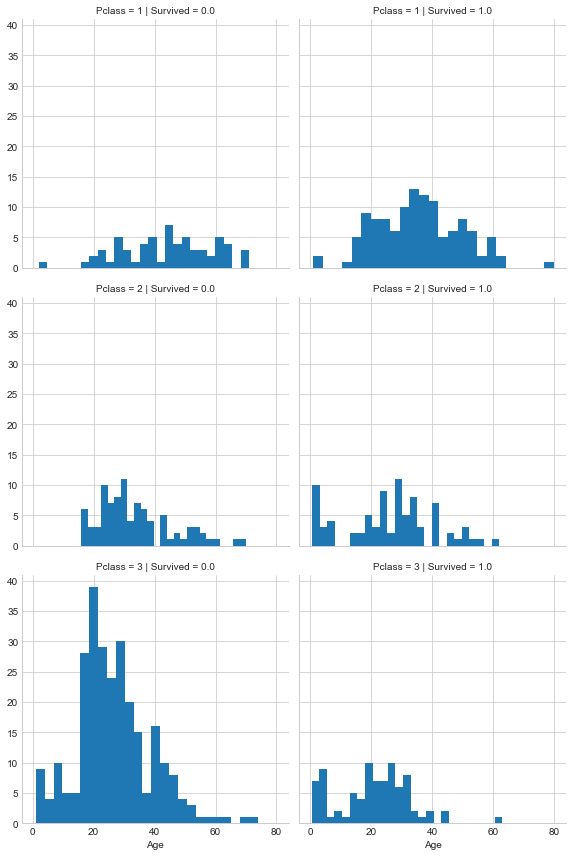

In [35]:
g = sns.FacetGrid(r, col = "Survived", row = "Pclass", size = 4)
g.map(plt.hist, "Age", bins = 25)
g.add_legend();

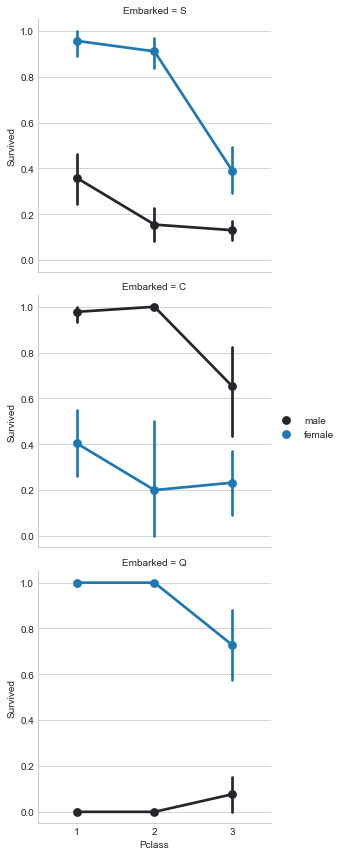

In [36]:
g = sns.FacetGrid(r, row = "Embarked", size = 4)
g.map(sns.pointplot, "Pclass","Survived","Sex")
g.add_legend();

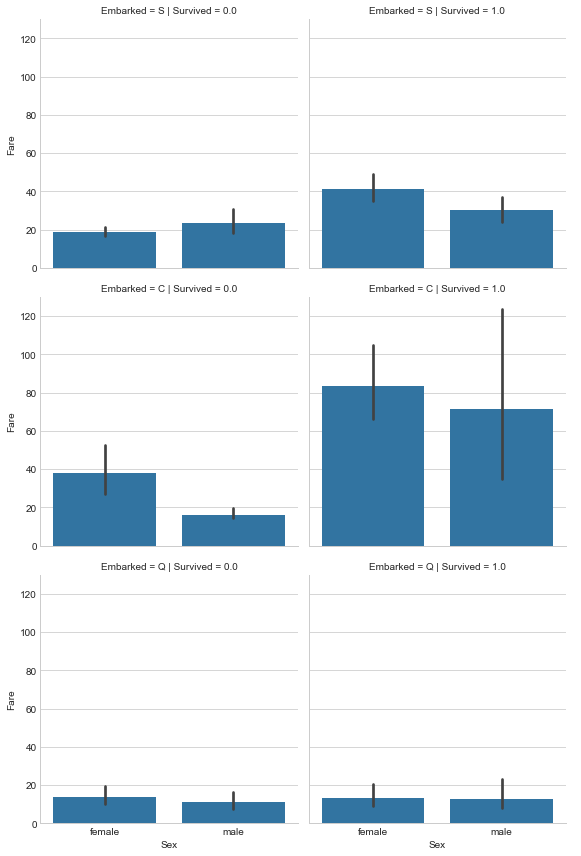

In [37]:
g = sns.FacetGrid(r, row = "Embarked", col = "Survived", size = 4)
g.map(sns.barplot, "Sex", "Fare")
g.add_legend();

In [38]:
r[r["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1291,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


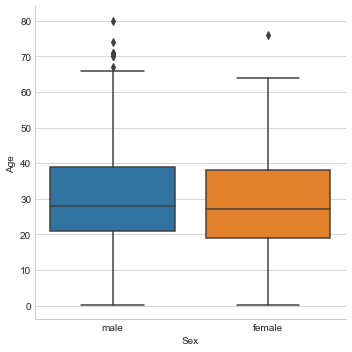

In [39]:
sns.factorplot(x = "Sex", y = "Age", data = r, kind = "box");

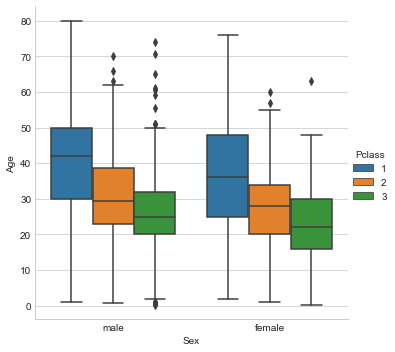

In [40]:
sns.factorplot(x = "Sex", y = "Age", hue = "Pclass",data = r, kind = "box");

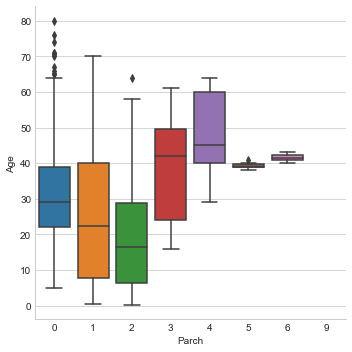

In [41]:
sns.factorplot(x = "Parch", y = "Age", data = r, kind = "box");

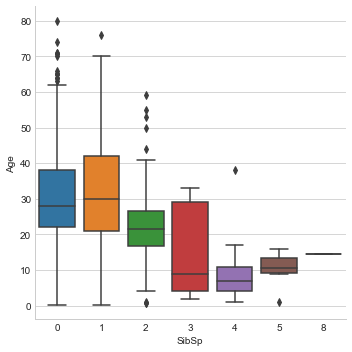

In [42]:
sns.factorplot(x = "SibSp", y = "Age", data = r, kind = "box");

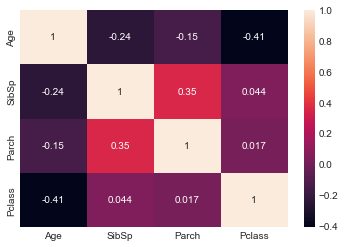

In [43]:
sns.heatmap(r[["Age","Sex","SibSp","Parch","Pclass"]].corr(), annot = True);

In [44]:
index_nan_age = list(r["Age"][r["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = r["Age"][((r["SibSp"] == r.iloc[i]["SibSp"]) &(r["Parch"] == r.iloc[i]["Parch"])& (r["Pclass"] == r.iloc[i]["Pclass"]))].median()
    age_med = r["Age"].median()
    if not np.isnan(age_pred):
        r["Age"].iloc[i] = age_pred
    else:
        r["Age"].iloc[i] = age_med

In [45]:
r[r["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Feaature Engineering

In [46]:
r["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [47]:
name = r["Name"]
r["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

In [48]:
r["Title"].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

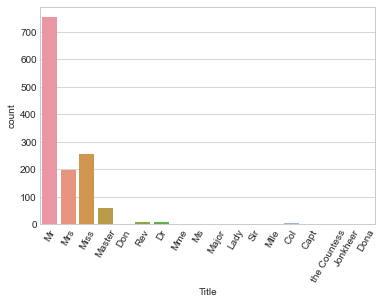

In [49]:
sns.countplot(x="Title", data = r)
plt.xticks(rotation = 60);

In [50]:
r["Title"] = r["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")
r["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in r["Title"]]
r["Title"].head(20)

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     0
8     1
9     1
10    1
11    1
12    2
13    2
14    1
15    1
16    0
17    2
18    1
19    1
Name: Title, dtype: int64

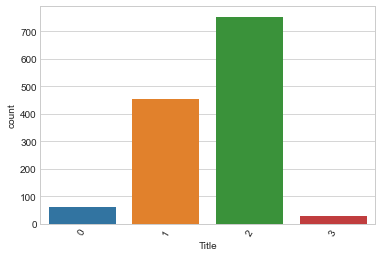

In [51]:
sns.countplot(x="Title", data = r)
plt.xticks(rotation = 60);

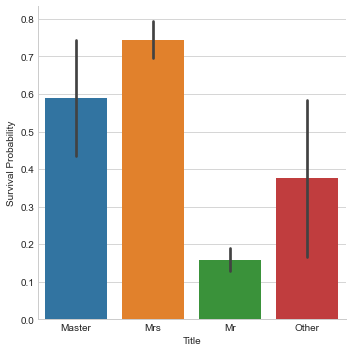

In [52]:
g = sns.factorplot(x = "Title", y = "Survived", data = r, kind = "bar")
g.set_xticklabels(["Master","Mrs","Mr","Other"])
g.set_ylabels("Survival Probability")

In [53]:
r.drop(labels = ["Name"], axis = 1, inplace = True)

In [54]:
r.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,2


In [55]:
r["Fsize"] = r["SibSp"] + r["Parch"] + 1

In [56]:
r.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,2
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,2
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,1,2
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,2,1


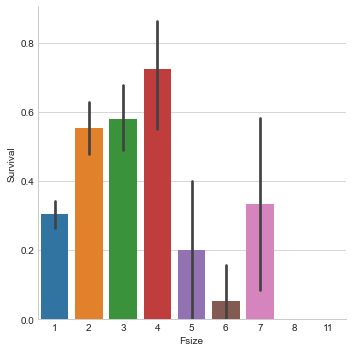

In [57]:
g = sns.factorplot(x = "Fsize", y = "Survived", data = r, kind = "bar")
g.set_ylabels("Survival");

In [58]:
r["family_size"] = [1 if i < 5 else 0 for i in r["Fsize"]]

In [59]:
r.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,family_size
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,2,1
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,2,1
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,1,2,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,2,1,1
5,6,0.0,3,male,25.0,0,0,330877,8.4583,NaN,Q,2,1,1
6,7,0.0,1,male,54.0,0,0,17463,51.8625,E46,S,2,1,1
7,8,0.0,3,male,2.0,3,1,349909,21.0750,NaN,S,0,5,0
8,9,1.0,3,female,27.0,0,2,347742,11.1333,NaN,S,1,3,1
9,10,1.0,2,female,14.0,1,0,237736,30.0708,NaN,C,1,2,1


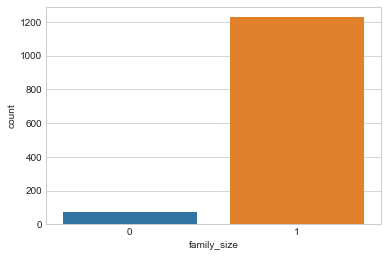

In [60]:
sns.countplot(x = "family_size", data = r);

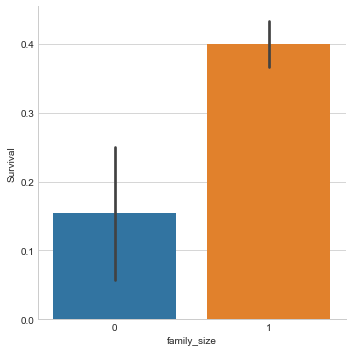

In [61]:
g = sns.factorplot(x = "family_size", y = "Survived", data = r, kind = "bar")
g.set_ylabels("Survival");

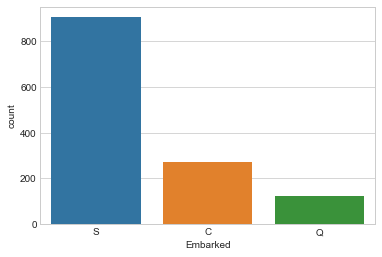

In [62]:
sns.countplot(x = "Embarked", data = r);

In [63]:
r = pd.get_dummies(r, columns=["Embarked"])
r.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Fsize,family_size,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,2,2,1,0,0,1
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,1,2,1,1,0,0
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1,1,0,0,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,1,2,1,0,0,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,2,1,1,0,0,1


In [64]:
r["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [65]:
tickets = []
for i in list(r.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
r["Ticket"] = tickets

In [66]:
r['Ticket'].head()

0        A5
1        PC
2    STONO2
3         x
4         x
Name: Ticket, dtype: object

In [67]:
r = pd.get_dummies(r, columns= ["Ticket"], prefix = "T")
r.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x
0,1,0.0,3,male,22.0,1,0,7.2500,NaN,2,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,1,female,38.0,1,0,71.2833,C85,1,...,0,0,0,0,0,0,0,0,0,0
2,3,1.0,3,female,26.0,0,0,7.9250,NaN,1,...,0,0,0,0,1,0,0,0,0,0
3,4,1.0,1,female,35.0,1,0,53.1000,C123,1,...,0,0,0,0,0,0,0,0,0,1
4,5,0.0,3,male,35.0,0,0,8.0500,NaN,2,...,0,0,0,0,0,0,0,0,0,1
5,6,0.0,3,male,25.0,0,0,8.4583,NaN,2,...,0,0,0,0,0,0,0,0,0,1
6,7,0.0,1,male,54.0,0,0,51.8625,E46,2,...,0,0,0,0,0,0,0,0,0,1
7,8,0.0,3,male,2.0,3,1,21.0750,NaN,0,...,0,0,0,0,0,0,0,0,0,1
8,9,1.0,3,female,27.0,0,2,11.1333,NaN,1,...,0,0,0,0,0,0,0,0,0,1
9,10,1.0,2,female,14.0,1,0,30.0708,NaN,1,...,0,0,0,0,0,0,0,0,0,1


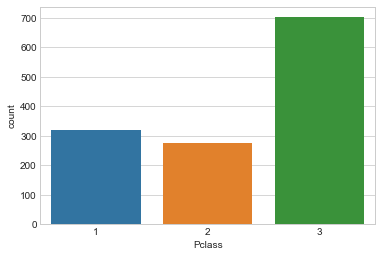

In [68]:
sns.countplot(x = "Pclass", data = r);

In [69]:
r["Pclass"] = r["Pclass"].astype("category")
r = pd.get_dummies(r, columns= ["Pclass"])

In [70]:
r["Sex"] = r["Sex"].astype("category")
r = pd.get_dummies(r, columns=["Sex"])
r.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title,Fsize,family_size,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0.0,22.0,1,0,7.2500,NaN,2,2,1,...,0,0,0,0,0,0,0,1,0,1
1,2,1.0,38.0,1,0,71.2833,C85,1,2,1,...,0,0,0,0,0,1,0,0,1,0
2,3,1.0,26.0,0,0,7.9250,NaN,1,1,1,...,0,0,0,0,0,0,0,1,1,0
3,4,1.0,35.0,1,0,53.1000,C123,1,2,1,...,0,0,0,0,1,1,0,0,1,0
4,5,0.0,35.0,0,0,8.0500,NaN,2,1,1,...,0,0,0,0,1,0,0,1,0,1


In [71]:
r.drop(labels = ["PassengerId", "Cabin"], axis = 1, inplace = True)

In [72]:
r.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Title', 'Fsize',
       'family_size', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'T_A', 'T_A4',
       'T_A5', 'T_AQ3', 'T_AQ4', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON', 'T_FC',
       'T_FCC', 'T_Fa', 'T_LINE', 'T_LP', 'T_PC', 'T_PP', 'T_PPP', 'T_SC',
       'T_SCA3', 'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS', 'T_SCParis',
       'T_SOC', 'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO',
       'T_STONO2', 'T_STONOQ', 'T_SWPP', 'T_WC', 'T_WEP', 'T_x', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male'],
      dtype='object')

### Model

In [73]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [74]:
rl

881

In [75]:
e = r[rl:]
e.drop(labels = ['Survived'], axis =1, inplace = True)

In [76]:
e.head()

,Age,SibSp,Parch,Fare,Title,Fsize,family_size,Embarked_C,Embarked_Q,Embarked_S,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
881,34.5,0,0,7.8292,2,1,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
882,47.0,1,0,7.0000,1,2,1,0,0,1,...,0,0,0,0,1,0,0,1,1,0
883,62.0,0,0,9.6875,2,1,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1
884,27.0,0,0,8.6625,2,1,1,0,0,1,...,0,0,0,0,1,0,0,1,0,1
885,22.0,1,1,12.2875,1,3,1,0,0,1,...,0,0,0,0,1,0,0,1,1,0


In [77]:
r = r[:rl]
X = r.drop(labels = 'Survived', axis =1)
y = r['Survived']

a,d,s,f = train_test_split(X,y,test_size = 0.33, random_state = 42)

In [78]:
print(a.shape)
print(s.shape)
print(d.shape)
print(f.shape)

(590, 52)
(590,)
(291, 52)
(291,)


#### Logistic Regression

In [79]:
lr = LogisticRegression()
lr.fit(a,s)

print('training accuracy : ',round(lr.score(a,s)*100,2),'%')
print('testing accuracy : ',round(lr.score(d,f)*100,2),'%')

training accuracy :  82.2 %
testing accuracy :  82.47 %


In [80]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                    svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [81]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(a,s)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.8322033898305085
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.7932203389830508
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.840677966101695
Fitting 10 folds for each of 14 candidates, totalling 140 fits
0.8152542372881356
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.7728813559322034


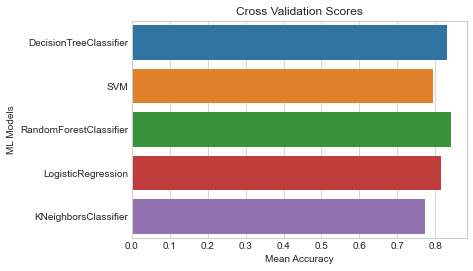

In [82]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores");

#### Ensemble model

In [83]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2]),
                                        ("lr",best_estimators[3])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(a, s)
print(accuracy_score(votingC.predict(d),f))

0.8350515463917526
